<a href="https://colab.research.google.com/github/codehacker4655/CNN-s/blob/main/Functional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model

In [ ]:
from keras.layers import *

In [ ]:
x = Input(shape=(3,))

In [ ]:
hidden1 = Dense(128,activation='relu')(x)
hidden2=Dense(64,activation='relu')(hidden1)

output1=Dense(1,activation='linear')(hidden2)
output2=Dense(1,activation='sigmoid')(hidden2)

In [ ]:
#you need to specify what are the input and output layers
model=Model(inputs = x,outputs =[output1,output2])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

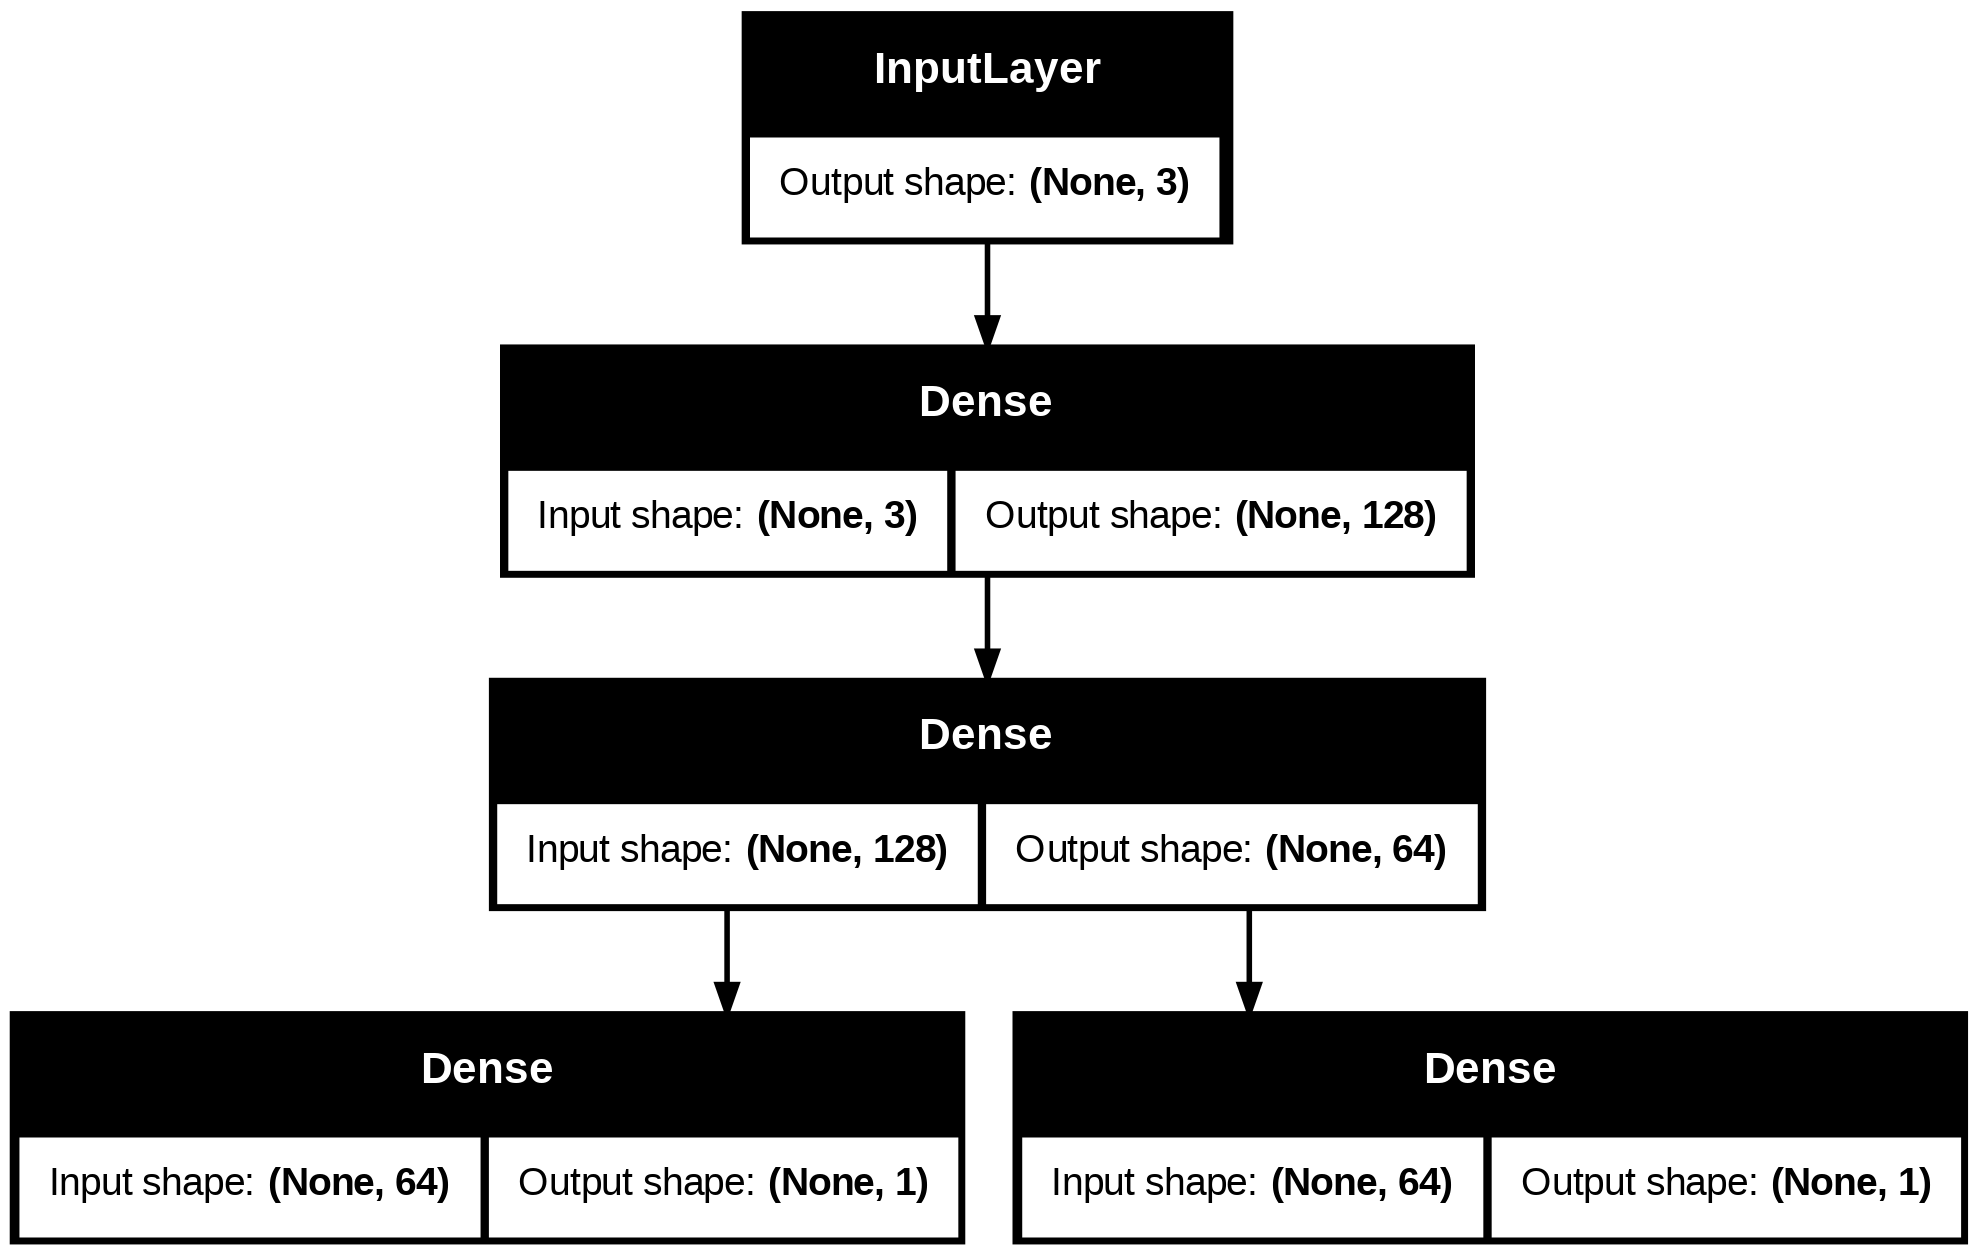

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

# Complex model

In [ ]:
from keras.layers import *
from keras.models import Model

In [ ]:
inputA = Input(shape=(32,))
inputB=Input(shape=(128,))

In [ ]:
x = Dense(8,activation='relu')(inputA)
x1 = Dense(4,activation='relu')(x)

In [ ]:
y = Dense(64,activation='relu')(inputB)
y1 = Dense(32,activation='relu')(y)
y2 = Dense(4,activation='relu')(y1)

In [ ]:
combined=concatenate([x1,y2])

In [ ]:
z=Dense(2,activation='relu')(combined)
z1=Dense(1,activation='relu')(z)

In [ ]:
model1 = Model(inputs=[inputA,inputB],outputs=z1)

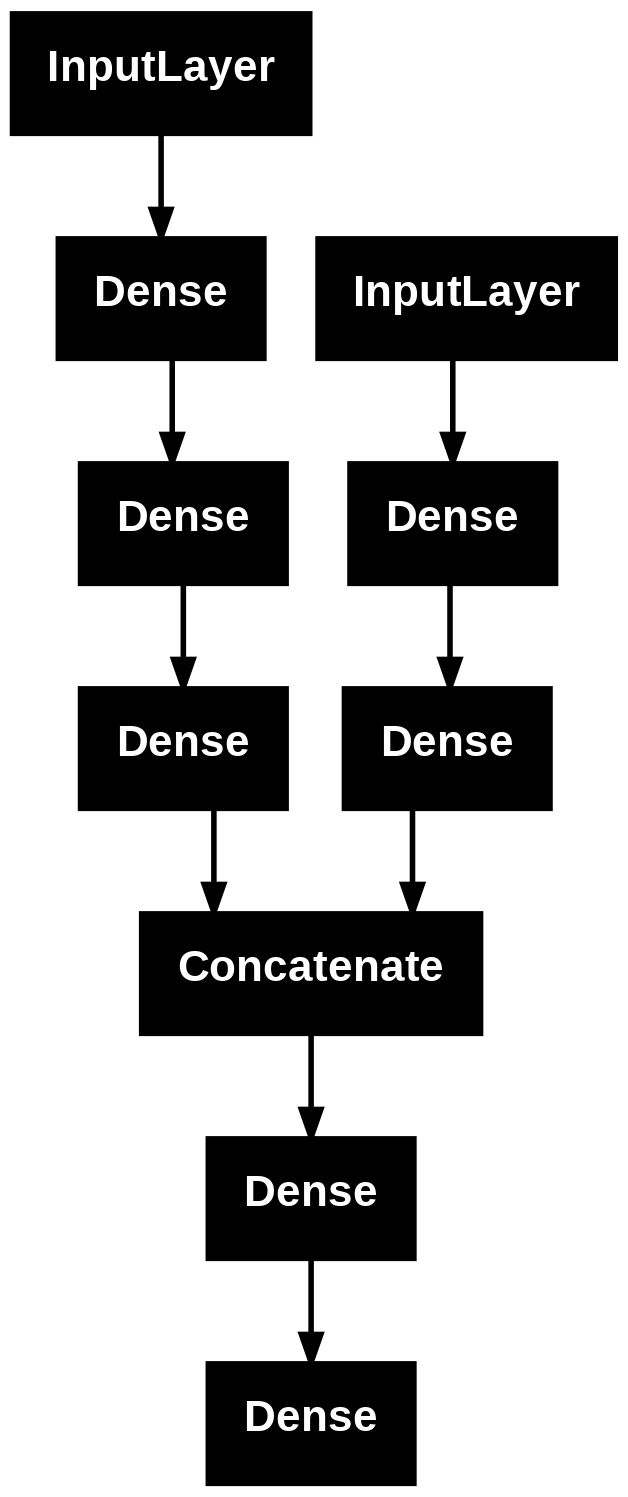

In [ ]:
from keras.utils import plot_model
plot_model(model1)

# multiple outputs

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

100%|██████████| 331M/331M [00:02<00:00, 160MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


In [ ]:
folder_path=path
import os

In [ ]:
import os

age=[]
gender=[]
img_path=[]

# Adjust folder_path to point to the directory containing the actual images
# This assumes the structure is /path/to/dataset/UTKFace/image_files.jpg
# If 'UTKFace' is a directory inside the current folder_path, update folder_path.
if 'UTKFace' in os.listdir(folder_path) and os.path.isdir(os.path.join(folder_path, 'UTKFace')):
    folder_path = os.path.join(folder_path, 'UTKFace')

for file in os.listdir(folder_path):
  # Skip if it's not a file (e.g., a subdirectory)
  if not os.path.isfile(os.path.join(folder_path, file)):
      continue
  # Ensure it's an image file by checking extension
  if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
      continue

  parts = file.split('_')
  # Expected format: age_gender_race_date.jpg
  if len(parts) >= 2:
      try:
          age.append(int(parts[0]))
          gender.append(int(parts[1]))
          img_path.append(file)
      except ValueError:
          print(f"Warning: Could not parse age/gender from filename: {file}. Skipping.")
          continue
  else:
      print(f"Warning: Unexpected filename format: {file}. Skipping.")
      continue


In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({"age":age,"gender":gender,"img_path":img_path})

In [ ]:
df.shape

(23708, 3)

In [ ]:
df.head()

,age,gender,img_path
0,30,1,30_1_2_20170116162557654.jpg.chip.jpg
1,29,1,29_1_1_20170113013111447.jpg.chip.jpg
2,26,1,26_1_0_20170116184549800.jpg.chip.jpg
3,1,0,1_0_0_20170109193820009.jpg.chip.jpg
4,23,1,23_1_1_20170114034152328.jpg.chip.jpg


In [ ]:
train_df=df.sample(frac=1,random_state=0).iloc[:20000]
test_df=df.sample(frac=1,random_state=0).iloc[20000:]

In [ ]:
train_df.shape

(20000, 3)

In [ ]:
test_df.shape

(3708, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img_path',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output'
                                                    )
test_generator=test_datagen.flow_from_dataframe(test_df,
                                                directory=folder_path,
                                                x_col='img_path',
                                                y_col=['age','gender'],
                                                target_size=(200,200),
                                                class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import *
from keras.models import Model

In [ ]:
vggnet = VGG16(include_top=False,input_shape=(200,200,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
vggnet.trainable=False

In [ ]:
vggnet.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
output = vggnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512,activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [ ]:
model=Model(inputs=vggnet.input,outputs=[output1,output2])

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 200, 200,  │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 200, 200,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 100, 100,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 100, 100,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 100, 100,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 50, 50,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 50, 50,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 50, 50,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 50, 50,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 25, 25,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 25, 25,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 25, 25,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 25, 25,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 12, 12,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 12, 12,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 12, 12,    │  2,359,808 │ block5_conv1[0][

 Total params: 34,116,418 (130.14 MB)

 Trainable params: 19,401,730 (74.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

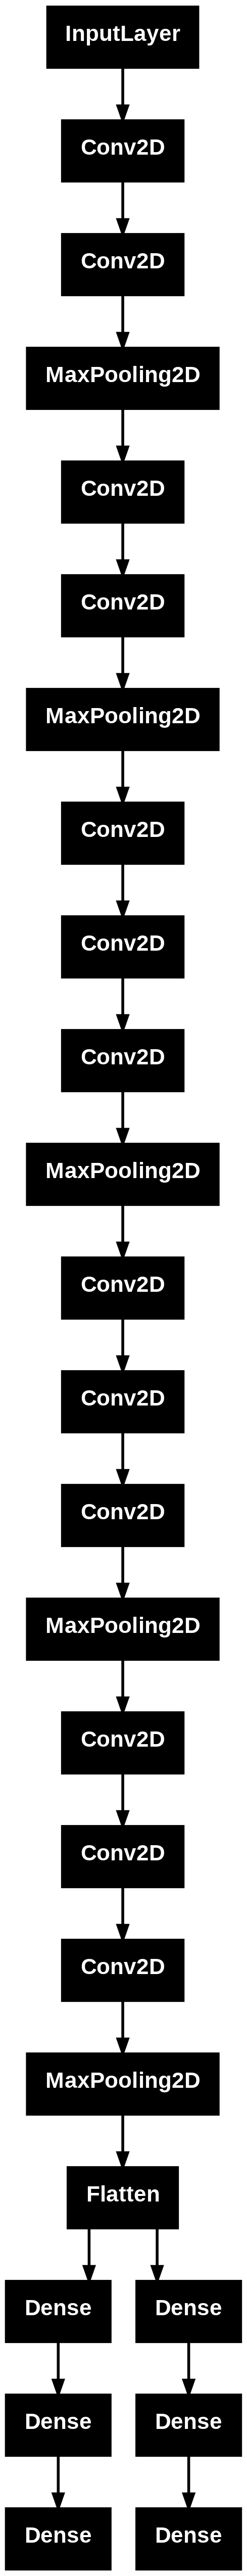

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'})

In [ ]:
import tensorflow as tf

def convert_generator_to_tf_dataset(data_generator, target_size):
    # Define the output signature for tf.data.Dataset.from_generator
    output_signature = (
        tf.TensorSpec(shape=(None, target_size[0], target_size[1], 3), dtype=tf.float32),
        (tf.TensorSpec(shape=(None,), dtype=tf.float32),  # for age (linear/mae)
         tf.TensorSpec(shape=(None,), dtype=tf.float32))   # for gender (sigmoid/binary_crossentropy)
    )

    # Wrapper generator to convert the list of y-outputs to a tuple
    def generator_wrapper():
        for x, y_list in data_generator:
            yield x, tuple(y_list)

    return tf.data.Dataset.from_generator(
        generator_wrapper,
        output_signature=output_signature
    ).prefetch(tf.data.AUTOTUNE)

# Convert the ImageDataGenerators to tf.data.Dataset
# target_size is (200,200) as defined in previous cells
train_ds = convert_generator_to_tf_dataset(train_generator, target_size=(200, 200))
test_ds = convert_generator_to_tf_dataset(test_generator, target_size=(200, 200))

# Fit the model using the tf.data.Dataset objects
# Remove batch_size from model.fit as the dataset already provides batched data
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
      2/Unknown 37s 18s/step - age_loss: 32.4293 - age_mae: 32.4293 - gender_accuracy: 0.4688 - gender_loss: 1.4905 - loss: 33.9198

KeyboardInterrupt: 